# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Zion Sayavong

## What does a Simple Regression Model do?
#### It uses an equation to to predict the value of a dependent variable, y, based on an independent variable, x

In [1]:
# 4. Import the four needed modules. See first code cell in ex_10-1_fish.ipynb.
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# 5. Load the diamonds dataset from Seaborn into a DataFrame.
data = sns.load_dataset('diamonds') 

In [3]:
# 6. Display the first five rows.
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-values)
* R-values identify the correlation between each pair of numeric variables in a DataFrame
* These values are represented by a float number within the range of [-1,1]
* Positive numbers represent a positive correlation within the data, with values closer to 1 depicting stronger relationships
* Negative numbers represent a negative correlation; values closer to -1 depicting stronger relationships
* Values closer to 0 represent a weaker relationship, with the range's midpoint 0 depicting no relationship

In [4]:
# 8. In a code cell, use the Pandas corr() method with the diamonds dataset and display the first seven rows.

''' Running this command gives a ValueError: could not convert string to float: 'Ideal' '''
#data.corr()

''' Run corrs() with only the columns with numeric values '''
data[['carat','depth','table','price','x','y','z']].corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

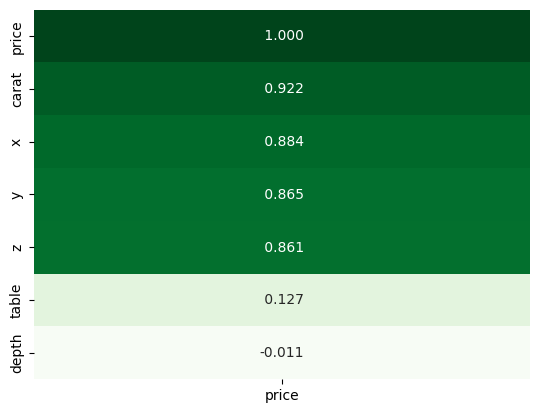

In [5]:
''' 9. Use a condensed heatmap to identify correlations for the price column.
    Sort the results, include annotations that format the values with three decimal places, and remove the color bar. '''
sns.heatmap(data[['carat','depth','table','price','x','y','z']].corr()[['price']]
            .sort_values(by='price',ascending=False), annot=True, cmap='Greens', cbar=False, fmt=f' .3f')

## Procedure for Creating and Using a Regression Model
1. Split dataset                                **[train_test_split()]**
2. Create model from training dataset           **[fit()]**
3. Validate model with test dataset             **[score()]**
4. If model is valid, predict data with it      **[predict()]**

In [6]:
# 11. In the next cell, add these imports needed for linear regression analysis:
'''
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
'''
# This was already done at the top of the program

'\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.model_selection import train_test_split \n'

In [7]:
''' 12. Use the column with the strongest correlation to split the data into test and training datasets, 
    where the test dataset consists of 30% of the total dataset. Specify a value of 20 for the random_state parameter. '''
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']], test_size=0.3, random_state=20)

In [8]:
# 13. Create a LinearRegression object named model and print it.
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

In [9]:
# 14. Fit the training dataset to the model.
linearModel.fit(x_train,y_train)

LinearRegression()

In [10]:
# 15. Score the model using the test dataset.
linearModel.score(x_test,y_test)

0.8504107786474794

In [11]:
# 16. Use the model to predict the y values based on the x values in the test dataset. Assign the results in a variable and display the variable.
y_predicted = linearModel.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [12]:
# 17. Put the predicted values in a new DataFrame with its single column named predicted_price. Then display the first three rows. 
predicted_price = pd.DataFrame(y_predicted, columns=['predicted_price'])
predicted_price.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [13]:
''' 18. Join the y_test and predicted data with the x_test data and save the joined data in a new DataFrame. 
    Then display the first five rows of the new DataFrame. '''
joined = predicted_price.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])

In [14]:
# 19. Melt the price and predicted_price columns together, assigning values to the var_name and value_name as shown. Display the melted DataFrame.
melted = pd.melt(joined, id_vars=['carat'], value_vars=['price','predicted_price'], var_name='price_type', value_name='price_value')
melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


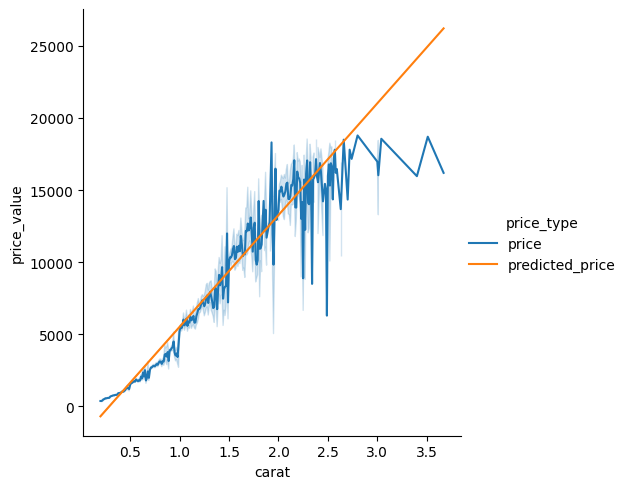

In [15]:
# 20. Use a Seaborn line plot without a confidence interval to plot the predicted data.
sns.relplot(data=melted, kind='line', x='carat', y='price_value', hue='price_type')

## Regression Line Equation is **y = mx + b**, where...
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept**

In [16]:
# 22. Enter the following lines in the next cell:
X = data.carat.values.reshape(-1,1)
y = data.price

In [17]:
# 23. Now, enter these lines in the next cell:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [42]:
# 24. Enter these lines in the following cell:
m = predicted.coef_
b = predicted.intercept_

''' predicted.coef_ returns its value in a one-element array. Attempting to format it with float() returns the following:
    DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. 
    Ensure you extract a single element from your array before performing this operation.
    
    Running the commands in the next two cells without extracting the value from its array returns the following error:
    TypeError: unsupported format string passed to numpy.ndarray.__format__'''
# Setting the value of m to the only element in its array removes the warning and eliminates the type error.
m = m[0]

print(f'The slope is {m} and the y-intercept is {b}')

The slope is 7756.425617968425 and the y-intercept is -2256.3605800453947


In [40]:
# 25. Use an f_string to print the equation of the regression line.
print(f'The equation of the regression line is y ={m}x + {b}')

The equation of the regression line is y =7756.425617968425x + -2256.3605800453947


In [41]:
# 26. Estimate the price of a 0.70 carat diamond with the equation. Use an f_string to print the results as shown.
print(f'The predicted price of a 0.70 carat diamond is ${m * 0.7 + b:.2f}')

The predicted price of a 0.70 carat diamond is $3173.14


In [35]:
# 27. Estimate the price of a 0.54 carat diamond with the equation. Use an f_string to print the results as shown.
print(f'The predicted price of a 0.54 carat diamond is ${m * 0.54 + b:.2f}')

The predicted price of a 0.54 carat diamond is $1932.11


In [ ]:
# 28. Are the estimates in the previous two cells close to the predicted prices in the results of step 18?

#0.70 	price 	2657.000000
#0.54 	price 	1637.000000

''' In step 18, the price listed for a 0.70 carat diamond was $2657 and for a 0.54 carat diamond $1637. Steps 26 and 27 had the price for a 0.7
    carat diamong at $3173.14 and for a 0.54 carat diamond $1932.11. In consideration with the scale of price_value, these values are relatively close. '''